# **Data Exploratory Analysis**
1.   Text Length Distribution
2.   Word Frequency Analysis
3.   Topic Modeling
4.   Sentiment Analysis

In [3]:
import pandas as pd

# Read data
data_path = 'Mental_Health_FAQ.csv'
data = pd.read_csv(data_path)

print(data.head(3).to_string(index=False))
print("\n" + "-" * 50 + "\n")
print("Number of rows:", data.shape[0])
print("Number of columns:", data.shape[1])

 Question_ID                                   Questions                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                

**Text Length Distribution:** Analyze the length of questions and answers in terms of words and characters to understand the data's verbosity.

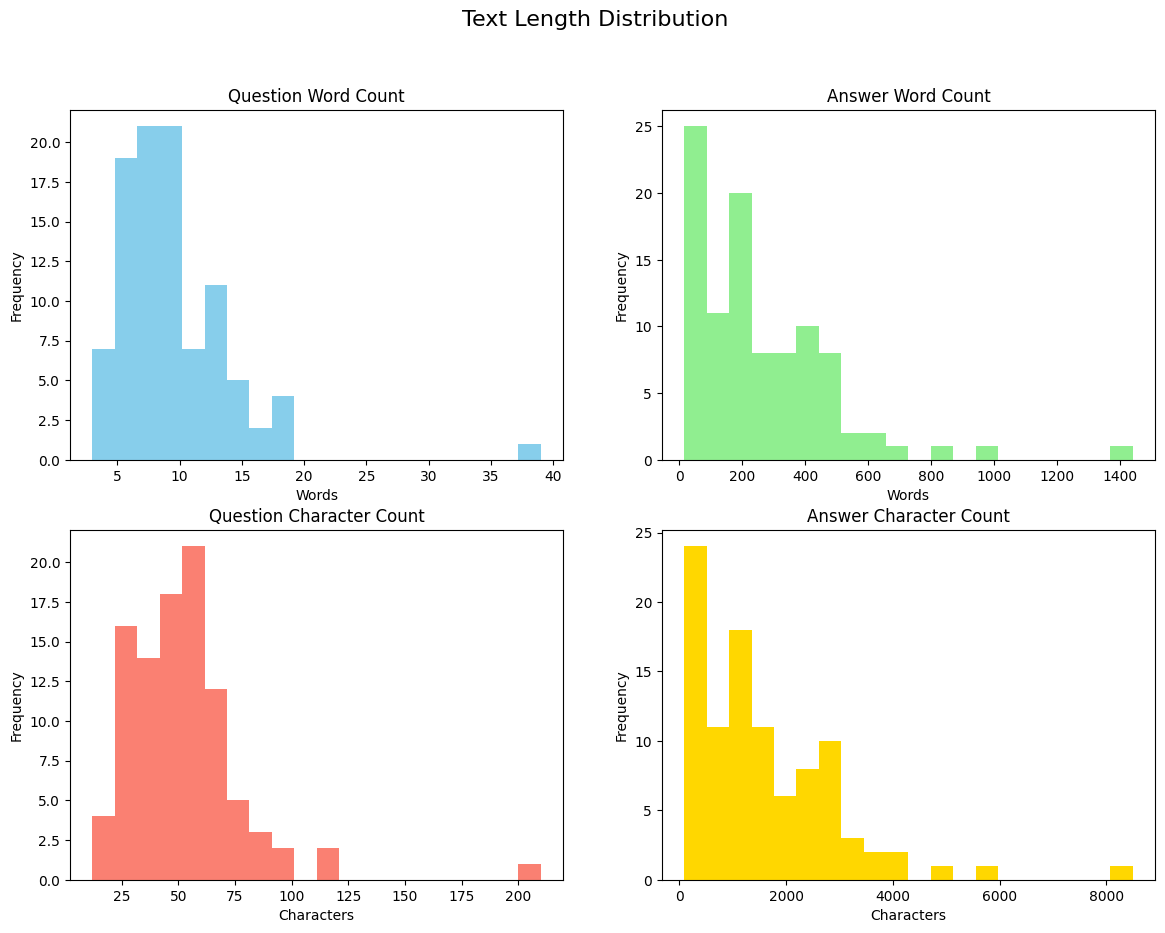

In [4]:
import matplotlib.pyplot as plt

# Calculate words and characters length
data['Question_Word_Count'] = data['Questions'].apply(lambda x: len(x.split()))
data['Answer_Word_Count'] = data['Answers'].apply(lambda x: len(x.split()))
data['Question_Char_Count'] = data['Questions'].apply(len)
data['Answer_Char_Count'] = data['Answers'].apply(len)

# Plot
fig, ax = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Text Length Distribution', fontsize=16)

# Question word count distribution
ax[0, 0].hist(data['Question_Word_Count'], bins=20, color='skyblue')
ax[0, 0].set_title('Question Word Count')
ax[0, 0].set_xlabel('Words')
ax[0, 0].set_ylabel('Frequency')

# Answer word count distribution
ax[0, 1].hist(data['Answer_Word_Count'], bins=20, color='lightgreen')
ax[0, 1].set_title('Answer Word Count')
ax[0, 1].set_xlabel('Words')
ax[0, 1].set_ylabel('Frequency')

# Question character count distribution
ax[1, 0].hist(data['Question_Char_Count'], bins=20, color='salmon')
ax[1, 0].set_title('Question Character Count')
ax[1, 0].set_xlabel('Characters')
ax[1, 0].set_ylabel('Frequency')

# Answer character count distribution
ax[1, 1].hist(data['Answer_Char_Count'], bins=20, color='gold')
ax[1, 1].set_title('Answer Character Count')
ax[1, 1].set_xlabel('Characters')
ax[1, 1].set_ylabel('Frequency')

plt.show()


**Word Frequency Analysis:** Find the most common words questions and answers


In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Join Questions and Answers
all_text = ' '.join(data['Questions']) + ' ' + ' '.join(data['Answers'])

# Tokenize
word_tokens = word_tokenize(all_text)

# Remove stopwords
stop_words = set(stopwords.words('english'))
filtered_words = [w for w in word_tokens if w.lower() not in stop_words and w.isalpha()]

# Calculate frequency distribution
freq_dist = nltk.FreqDist(filtered_words)

# Show most 50 common words
for word, frequency in freq_dist.most_common(50):
    print(f'{word}: {frequency}')


health: 218
may: 187
mental: 181
people: 170
help: 159
like: 105
support: 102
find: 99
BC: 99
time: 81
use: 80
illness: 77
disorder: 77
one: 77
feel: 75
doctor: 74
symptoms: 73
also: 71
treatment: 70
different: 70
information: 67
important: 66
problems: 65
see: 65
Health: 65
care: 64
Mental: 61
need: 59
experience: 58
family: 58
loved: 56
talk: 54
services: 53
someone: 50
good: 49
depression: 49
anxiety: 49
work: 49
make: 46
thoughts: 43
social: 42
problem: 42
might: 42
know: 41
learn: 41
many: 41
way: 41
lot: 41
feelings: 39
person: 39


**Topic Modeling:** Use Latent Dirichlet Allocation (LDA) to find the latent topics in answers to understand topics in the text.

In [6]:
from gensim import corpora, models
import nltk
from nltk.tokenize import word_tokenize

answers = data['Answers']

# Tokenize and remove stopwords
stop_words = set(stopwords.words('english'))
texts = [[word for word in word_tokenize(answer.lower()) if word.isalpha() and word not in stop_words] for answer in answers]

# Apply LDA
dictionary = corpora.Dictionary(texts)
LDA_texts = [dictionary.doc2bow(text) for text in texts]

lda_model = models.LdaModel(LDA_texts, num_topics=5, id2word=dictionary, passes=15)

# Show
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)


(0, '0.019*"mental" + 0.014*"symptoms" + 0.014*"treatment" + 0.013*"illness" + 0.011*"vaping"')
(1, '0.023*"may" + 0.016*"people" + 0.011*"disorder" + 0.009*"problems" + 0.008*"use"')
(2, '0.013*"people" + 0.010*"time" + 0.010*"feel" + 0.010*"thinking" + 0.009*"anxiety"')
(3, '0.031*"health" + 0.025*"mental" + 0.013*"people" + 0.013*"support" + 0.012*"help"')
(4, '0.015*"loved" + 0.015*"one" + 0.014*"like" + 0.013*"health" + 0.012*"help"')


**Sentiment Analysis:**

In [8]:
from textblob import TextBlob
import matplotlib.pyplot as plt

answers = data['Answers']
polarities = []
subjectivities = []

# Analyze sentiment:
# Providing a polarity score indicating the positivity or negativity of the text and a subjectivity score refers to the expression of personal opinions, emotions, judgments, or beliefs in a text.
# Unlike objectivity, which represents factual information
for i, answer in enumerate(answers):
    sentiment = TextBlob(answer).sentiment
    polarities.append(sentiment.polarity)
    subjectivities.append(sentiment.subjectivity)
    print(f'Answer {i+1}: Polarity = {sentiment.polarity}, Subjectivity = {sentiment.subjectivity}')

Answer 1: Polarity = 0.029761904761904764, Subjectivity = 0.38160522273425496
Answer 2: Polarity = -0.02192118226600985, Subjectivity = 0.42315270935960586
Answer 3: Polarity = -0.02192118226600985, Subjectivity = 0.42315270935960586
Answer 4: Polarity = -0.07196969696969696, Subjectivity = 0.41168831168831166
Answer 5: Polarity = 0.16433566433566432, Subjectivity = 0.5461538461538461
Answer 6: Polarity = 0.13636363636363635, Subjectivity = 0.34545454545454546
Answer 7: Polarity = 0.31666666666666665, Subjectivity = 0.35000000000000003
Answer 8: Polarity = 0.1888888888888889, Subjectivity = 0.49365079365079356
Answer 9: Polarity = 0.12291666666666667, Subjectivity = 0.47194940476190483
Answer 10: Polarity = 0.17142857142857143, Subjectivity = 0.37142857142857144
Answer 11: Polarity = 0.31666666666666665, Subjectivity = 0.35000000000000003
Answer 12: Polarity = 0.1703703703703704, Subjectivity = 0.49867724867724866
Answer 13: Polarity = 0.1863095238095238, Subjectivity = 0.2761904761904

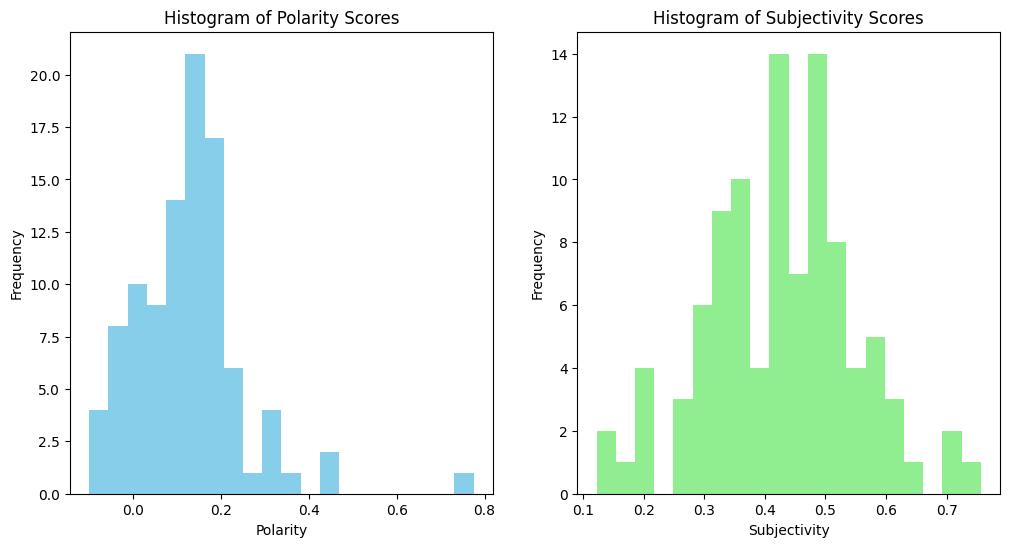

In [9]:
# Plot polarity scores and subjectivity scores
plt.figure(figsize=(12, 6))

# Histogram Polarity
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(polarities, bins=20, color='skyblue')
plt.title('Histogram of Polarity Scores')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Histogram Subjectivity
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(subjectivities, bins=20, color='lightgreen')
plt.title('Histogram of Subjectivity Scores')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.show()